In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

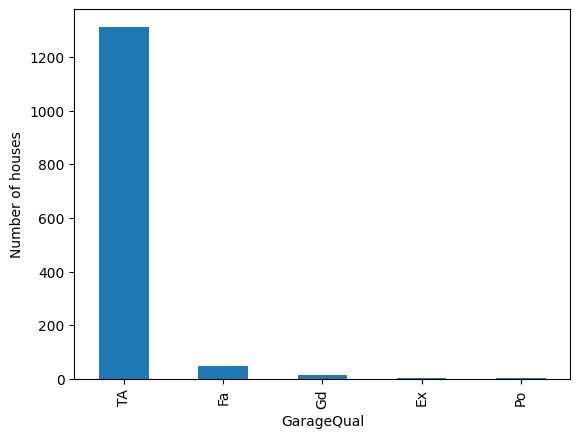

In [5]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [6]:
# df['GarageQual'] = df['GarageQual'].fillna('Missing')


In [7]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

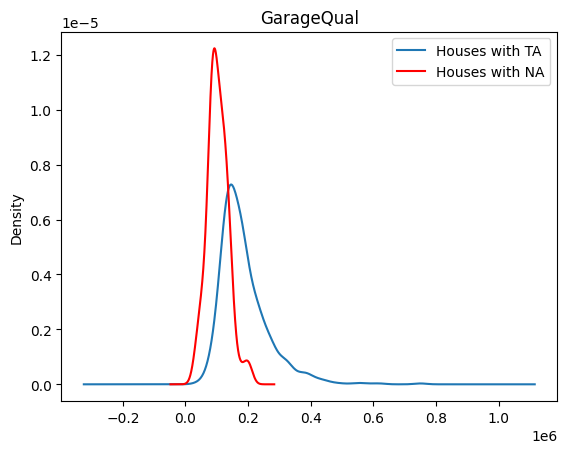

In [8]:

fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [9]:

temp = df[df['GarageQual']=='TA']['SalePrice']

df['GarageQual'].fillna('TA', inplace=True)


C:\Users\susha\AppData\Local\Temp\ipykernel_6000\412591492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

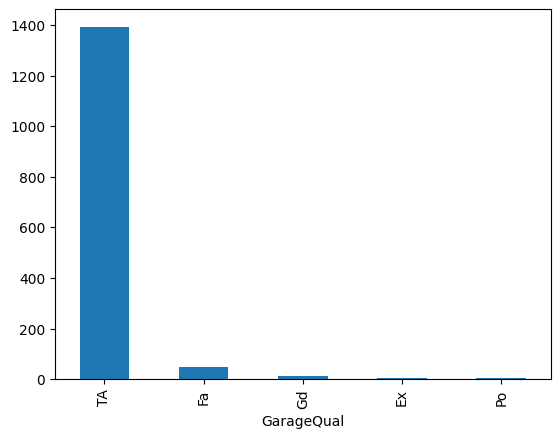

In [10]:

df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

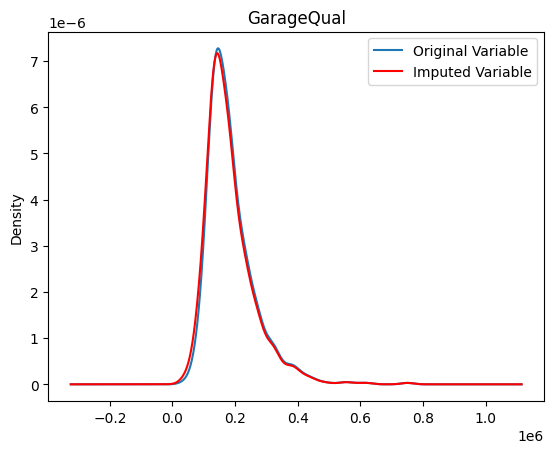

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distrubution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

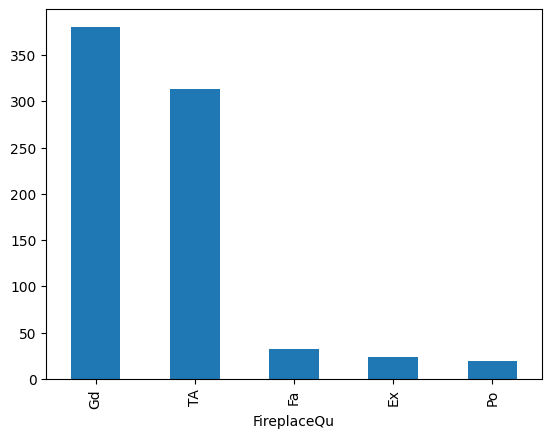

In [12]:
df['FireplaceQu'].value_counts().plot.bar()

In [13]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

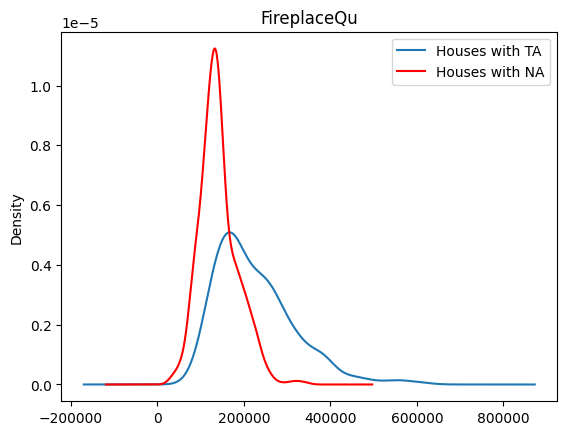

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [15]:

temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [16]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')


<Axes: xlabel='FireplaceQu'>

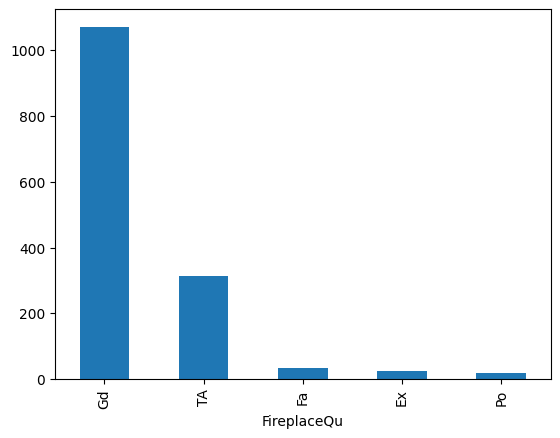

In [17]:

df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

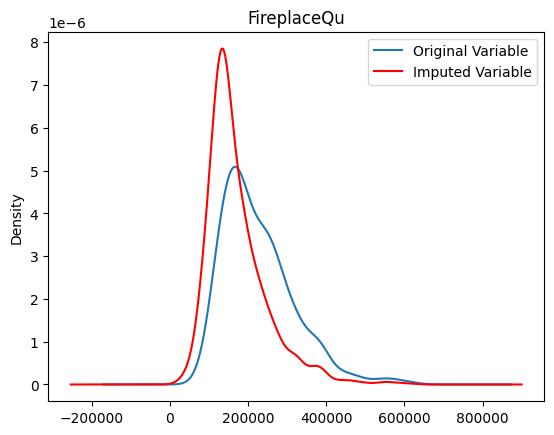

In [18]:

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distrubution of the variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

## Using SK-Learn

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('SalePrice',axis=1),
    df['SalePrice'],
    test_size=0.2,
    random_state=42
)

In [31]:
X_train.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [33]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [34]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [35]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [36]:
X_train.isnull().sum()

0    0
1    0
dtype: int64